<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Lab 2b - k-Nearest Neighbors </h2><h3></h3></th>
    </tr>
</table>

In [1]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task.

In [2]:
# Loading the data
bank = pd.read_csv('bank.csv')
print(bank.head())
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)
print(bank.head())
    
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 

In [3]:
#K Nearest Neighbors Model
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3) # set as three nearest neighbors
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
print('train_acc:', knn_clf.score(X_train, y_train), 
      '\n test_acc:', knn_clf.score(X_test, y_test))

train_acc: 0.8729980960913876 
 test_acc: 0.7657859381997313


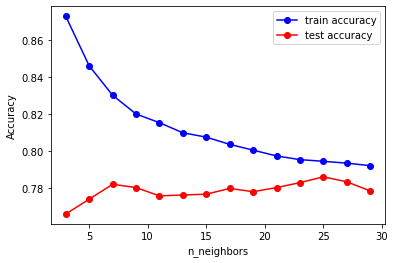

In [5]:
# Find the best n_neighbors 

train_accuracy = []
test_accuracy = []

neighbors_settings = range(3, 30, 2) # from 3 to 30 with step 2 (only set K as odd numbers for this binary classification task)
for n_neighbors in neighbors_settings:
    # build the model
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)
    # record train accuracy
    train_accuracy.append(knn_clf.score(X_train, y_train))
    # record test accuracy
    test_accuracy.append(knn_clf.score(X_test, y_test))
        
plt.plot(neighbors_settings, train_accuracy, 'bo-', label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, 'ro-', label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [6]:
3+np.argmax(test_accuracy)*2

25

In [8]:
#K Nearest Neighbors Final Model
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=25)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [9]:
print('train_acc:', knn_clf.score(X_train, y_train), 
      '\n test_acc:', knn_clf.score(X_test, y_test))

train_acc: 0.7943778698622466 
 test_acc: 0.7859381997313032


### 2. Regression
We will be using the supermarket data for regression task. 

In [10]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
print(supermarket.head())

# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)
print(supermarket.head())

# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

In [11]:
#K Nearest Neighbors Model
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=3) # set as three nearest neighbors
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
print('train_mae:', mean_absolute_error(knn_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(knn_reg.predict(X_test), y_test))

train_mae: 573.8584343879642 
 test_mae: 792.3576163868905


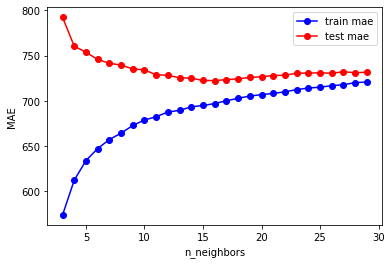

In [13]:
# Find the best n_neighbors 

train_mae = []
test_mae = []

neighbors_settings = range(3,30) # ranges from 3 to 30
for n_neighbors in neighbors_settings:
    # build the model
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    # record training mae
    train_mae.append(mean_absolute_error(knn_reg.predict(X_train), y_train))
    # record test mae
    test_mae.append(mean_absolute_error(knn_reg.predict(X_test), y_test))
    
plt.plot(neighbors_settings, train_mae, 'bo-', label="train mae")
plt.plot(neighbors_settings, test_mae, 'ro-', label="test mae")
plt.ylabel("MAE")
plt.xlabel("n_neighbors")
plt.legend()

In [14]:
3 + np.argmin(test_mae)

16

In [15]:
#K Nearest Neighbors Final Model
knn_reg = neighbors.KNeighborsRegressor(n_neighbors=16)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=16)

In [16]:
print('train_mae:', mean_absolute_error(knn_reg.predict(X_train), y_train), 
      '\n test_mae:', mean_absolute_error(knn_reg.predict(X_test), y_test))

train_mae: 697.06016608562 
 test_mae: 722.4440676184053


In [17]:
supermarket.Item_Outlet_Sales.describe()

count    8337.000000
mean     2059.362844
std      1506.099754
min        33.290000
25%       810.944400
50%      1747.059200
75%      2998.097400
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

In [18]:
# R squared value
knn_reg.score(X_test, y_test)

0.5497683643050535